Problem Statement:Predicting Used Car Resale Prices.
The goal is to build a regression model that accurately predicts the resale value (price_usd) of a used car based on its features. This can help dealerships, buyers, and sellers make informed pricing decisions.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('EDA9used_car_price_dataset_extended.csv',encoding='unicode_escape')

In [3]:
df

,make_year,mileage_kmpl,engine_cc,fuel_type,owner_count,price_usd,brand,transmission,color,service_history,accidents_reported,insurance_valid
0,2001,8.17,4000,Petrol,4,8587.64,Chevrolet,Manual,White,NaN,0,No
1,2014,17.59,1500,Petrol,4,5943.50,Honda,Manual,Black,NaN,0,Yes
2,2023,18.09,2500,Diesel,5,9273.58,BMW,Automatic,Black,Full,1,Yes
3,2009,11.28,800,Petrol,1,6836.24,Hyundai,Manual,Blue,Full,0,Yes
4,2005,12.23,1000,Petrol,2,4625.79,Nissan,Automatic,Red,Full,0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1996,15.25,1500,Petrol,2,5498.71,Hyundai,Manual,Silver,NaN,0,Yes
9996,1997,14.45,5000,Diesel,1,9588.31,Honda,Manual,Gray,Full,0,Yes
9997,2002,19.41,1000,Diesel,4,4557.10,Kia,Manual,Black,Full,0,Yes
9998,2005,12.95,4000,Petrol,5,7413.59,BMW,Automatic,Blue,Full,0,Yes


In [4]:
df.head()

,make_year,mileage_kmpl,engine_cc,fuel_type,owner_count,price_usd,brand,transmission,color,service_history,accidents_reported,insurance_valid
0,2001,8.17,4000,Petrol,4,8587.64,Chevrolet,Manual,White,NaN,0,No
1,2014,17.59,1500,Petrol,4,5943.50,Honda,Manual,Black,NaN,0,Yes
2,2023,18.09,2500,Diesel,5,9273.58,BMW,Automatic,Black,Full,1,Yes
3,2009,11.28,800,Petrol,1,6836.24,Hyundai,Manual,Blue,Full,0,Yes
4,2005,12.23,1000,Petrol,2,4625.79,Nissan,Automatic,Red,Full,0,Yes


In [5]:
df.tail()

,make_year,mileage_kmpl,engine_cc,fuel_type,owner_count,price_usd,brand,transmission,color,service_history,accidents_reported,insurance_valid
9995,1996,15.25,1500,Petrol,2,5498.71,Hyundai,Manual,Silver,NaN,0,Yes
9996,1997,14.45,5000,Diesel,1,9588.31,Honda,Manual,Gray,Full,0,Yes
9997,2002,19.41,1000,Diesel,4,4557.10,Kia,Manual,Black,Full,0,Yes
9998,2005,12.95,4000,Petrol,5,7413.59,BMW,Automatic,Blue,Full,0,Yes
9999,2007,18.81,5000,Petrol,1,11634.09,BMW,Automatic,Silver,Full,0,Yes


In [6]:
df.shape

(10000, 12)

In [7]:
df.columns

Index(['make_year', 'mileage_kmpl', 'engine_cc', 'fuel_type', 'owner_count',
       'price_usd', 'brand', 'transmission', 'color', 'service_history',
       'accidents_reported', 'insurance_valid'],
      dtype='object')

In [8]:
df.describe()

,make_year,mileage_kmpl,engine_cc,owner_count,price_usd,accidents_reported
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2009.206900,17.960753,2287.130000,3.003500,7179.754532,0.492200
std,8.373858,5.025486,1291.276927,1.418904,2795.270940,0.694109
min,1995.000000,5.000000,800.000000,1.000000,1000.000000,0.000000
25%,2002.000000,14.540000,1200.000000,2.000000,5176.547500,0.000000
50%,2009.000000,17.970000,1800.000000,3.000000,6961.260000,0.000000
75%,2016.000000,21.352500,3000.000000,4.000000,8993.732500,1.000000
max,2023.000000,35.000000,5000.000000,5.000000,17647.630000,5.000000


In [9]:
df.isna().sum()

make_year                0
mileage_kmpl             0
engine_cc                0
fuel_type                0
owner_count              0
price_usd                0
brand                    0
transmission             0
color                    0
service_history       2038
accidents_reported       0
insurance_valid          0
dtype: int64

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df['service_history']=df['service_history'].fillna(df['service_history'].mode()[0])

In [12]:
df.isna().sum()

make_year             0
mileage_kmpl          0
engine_cc             0
fuel_type             0
owner_count           0
price_usd             0
brand                 0
transmission          0
color                 0
service_history       0
accidents_reported    0
insurance_valid       0
dtype: int64

In [13]:
numerical_column=df.select_dtypes(exclude='object')
numerical_column

,make_year,mileage_kmpl,engine_cc,owner_count,price_usd,accidents_reported
0,2001,8.17,4000,4,8587.64,0
1,2014,17.59,1500,4,5943.50,0
2,2023,18.09,2500,5,9273.58,1
3,2009,11.28,800,1,6836.24,0
4,2005,12.23,1000,2,4625.79,0
...,...,...,...,...,...,...
9995,1996,15.25,1500,2,5498.71,0
9996,1997,14.45,5000,1,9588.31,0
9997,2002,19.41,1000,4,4557.10,0
9998,2005,12.95,4000,5,7413.59,0


**Finding Outlier**


<Axes: xlabel='make_year'>

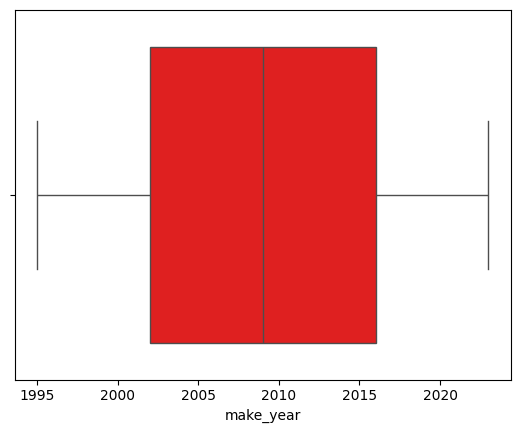

In [14]:
sns.boxplot(x='make_year',data=df,color='red')

<Axes: xlabel='mileage_kmpl'>

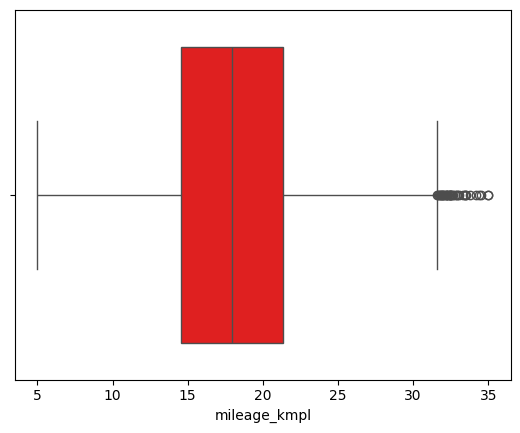

In [15]:
sns.boxplot(x='mileage_kmpl',data=df,color='red')

<Axes: xlabel='engine_cc'>

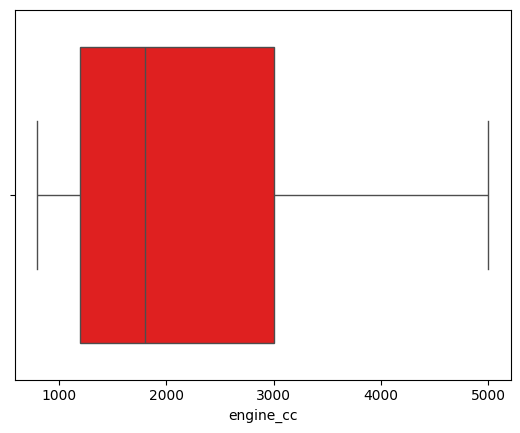

In [16]:
sns.boxplot(x='engine_cc',data=df,color='red')

<Axes: xlabel='owner_count'>

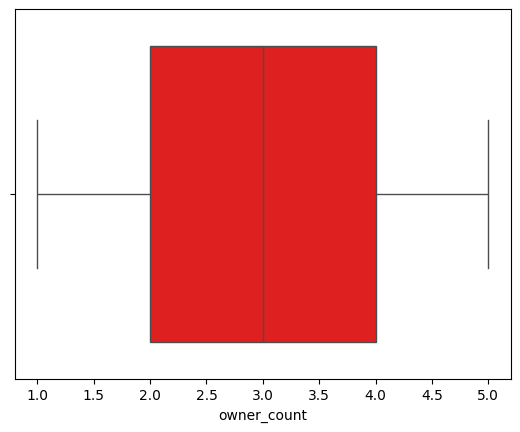

In [17]:
sns.boxplot(x='owner_count',data=df,color='red')

<Axes: xlabel='price_usd'>

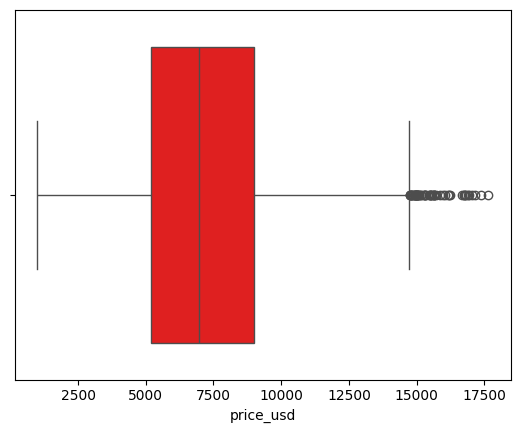

In [18]:
sns.boxplot(x='price_usd',data=df,color='red')

<Axes: xlabel='accidents_reported'>

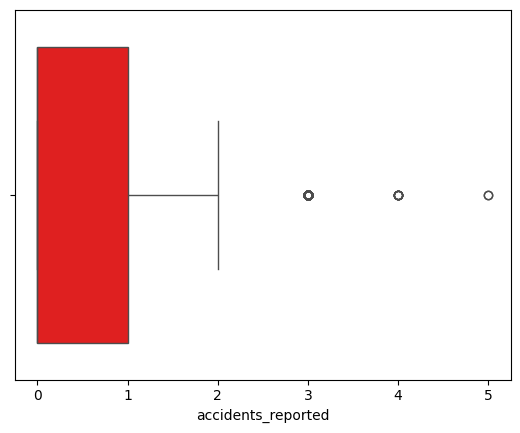

In [19]:
sns.boxplot(x='accidents_reported',data=df,color='red')

In [20]:
df=df[df['mileage_kmpl']<df['mileage_kmpl'].quantile(0.99)]
df=df[df['price_usd']<df['price_usd'].quantile(0.99)]
df=df[df['accidents_reported']<df['accidents_reported'].quantile(0.99)]

<Axes: xlabel='mileage_kmpl'>

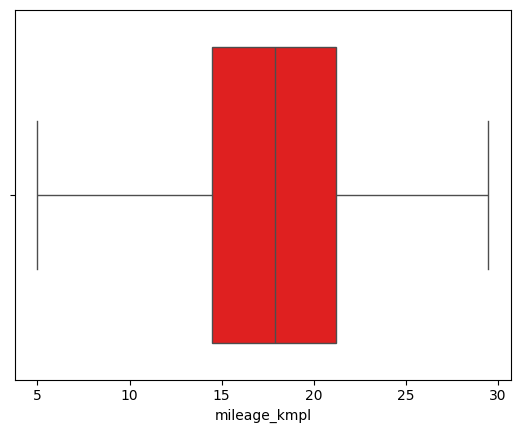

In [21]:
sns.boxplot(x='mileage_kmpl',data=df,color='red')

<Axes: xlabel='price_usd'>

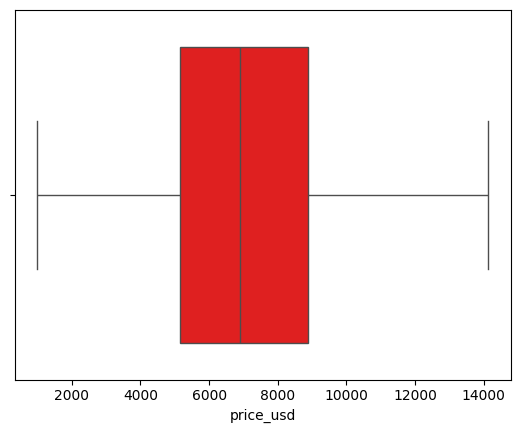

In [22]:
sns.boxplot(x='price_usd',data=df,color='red')

<Axes: xlabel='accidents_reported'>

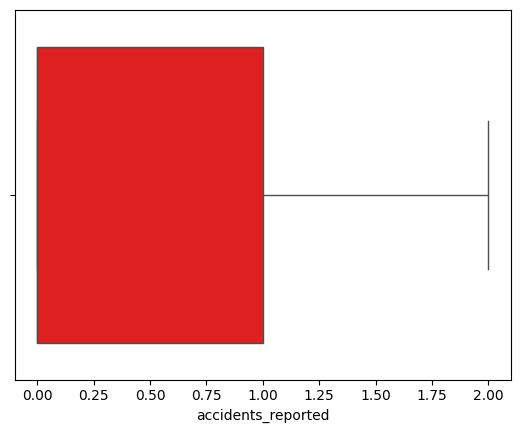

In [23]:
sns.boxplot(x='accidents_reported',data=df,color='red')

In [24]:
df.shape

(9671, 12)

**Exploratory Data Analysis**

In [25]:
df['price_usd'].value_counts()

price_usd
1000.00     50
8354.44      2
4136.87      2
5588.55      2
8459.67      2
            ..
13416.77     1
6587.68      1
7916.69      1
7534.81      1
7337.50      1
Name: count, Length: 9581, dtype: int64

In [26]:
df['price_usd'].max(),df['price_usd'].max()

(np.float64(14131.31), np.float64(14131.31))

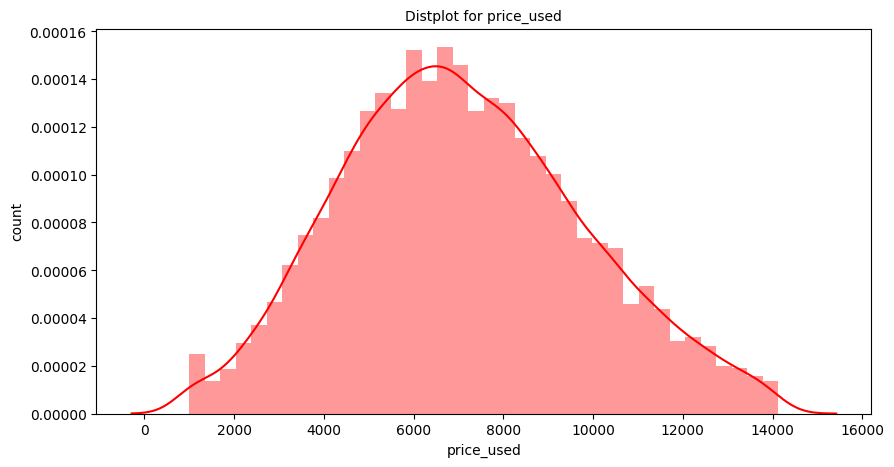

In [27]:
plt.figure(figsize=(10,5))
sns.distplot(df['price_usd'],color="r")
plt.title('Distplot for price_used',fontsize=10)
plt.xlabel('price_used',fontsize=10)
plt.ylabel('count',fontsize=10)
plt.show()


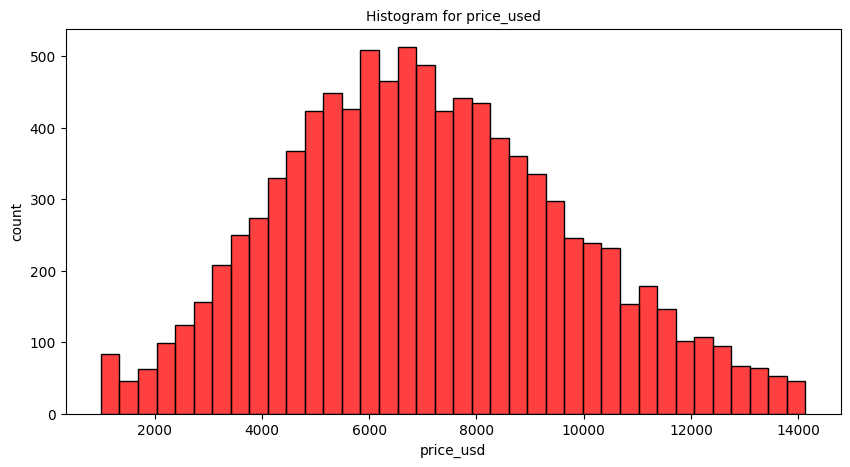

In [28]:
plt.figure(figsize=(10,5))
sns.histplot(x='price_usd',data=df,color="r")
plt.title('Histogram for price_used',fontsize=10)
plt.xlabel('price_usd',fontsize=10)
plt.ylabel('count',fontsize=10)
plt.show()


Observation: From graph we can observe that The distribution of "price_usd" appears to be roughly bell-shaped, resembling a normal distribution, but with a slight skew to the right (positive skew). This means that while most prices are clustered around the central values, there's a tail extending towards higher prices.

In [29]:
df['make_year'].unique()

array([2001, 2014, 2023, 2009, 2005, 2002, 2015, 2020, 2013, 2017, 2018,
       1998, 1997, 2016, 1996, 2006, 2000, 2022, 1995, 2011, 2021, 2004,
       2010, 2019, 1999, 2003, 2012, 2008, 2007])

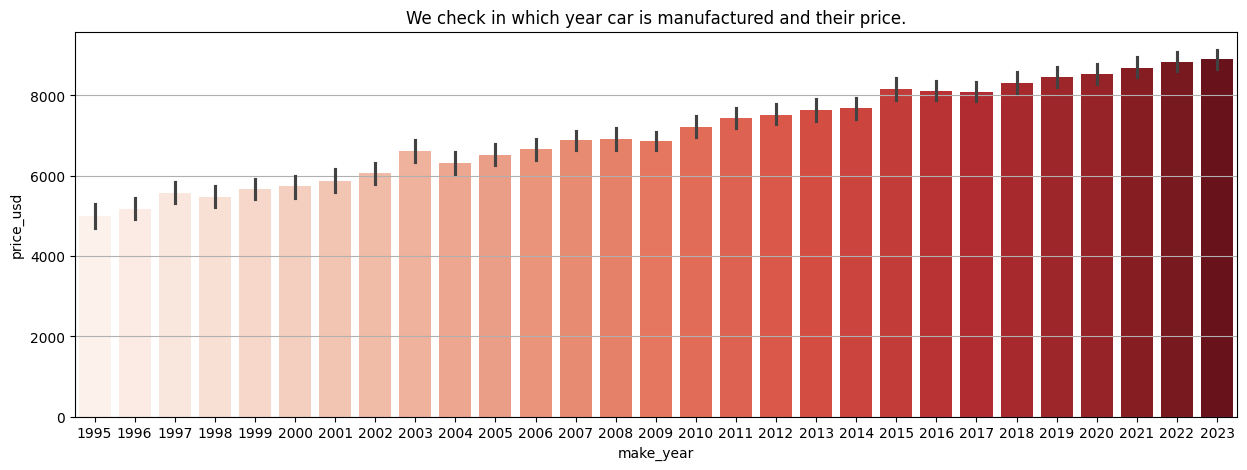

In [30]:
plt.figure(figsize=(15,5))
sns.barplot(x='make_year',y='price_usd',data=df,palette='Reds')
plt.title('We check in which year car is manufactured and their price.')
plt.xlabel('make_year',fontsize=10)
plt.ylabel('price_usd',fontsize=10)
plt.grid(axis='y')

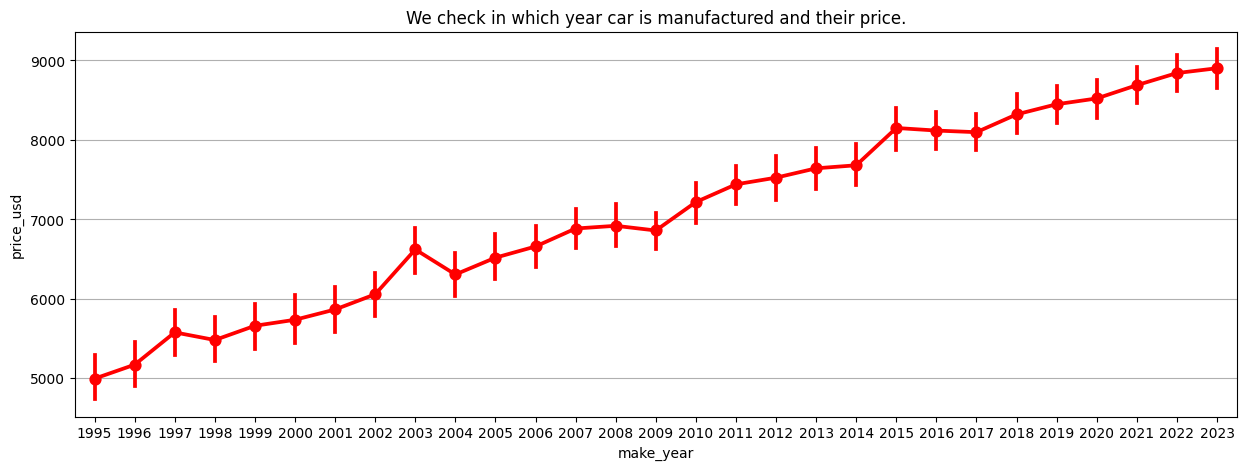

In [31]:
plt.figure(figsize=(15,5))
sns.pointplot(x='make_year',y='price_usd',data=df,color="r")
plt.title('We check in which year car is manufactured and their price.')
plt.xlabel('make_year',fontsize=10)
plt.ylabel('price_usd',fontsize=10)
plt.grid(axis='y')

observation:from graph we can  clearly see that the distribution of our dependent variable is left skewed.
Most the car have highest price which are manufactored in year between 2021 and 2023.

In [32]:
df['mileage_kmpl'].unique()

array([ 8.17, 17.59, 18.09, ...,  9.77,  8.27,  6.51], shape=(2114,))

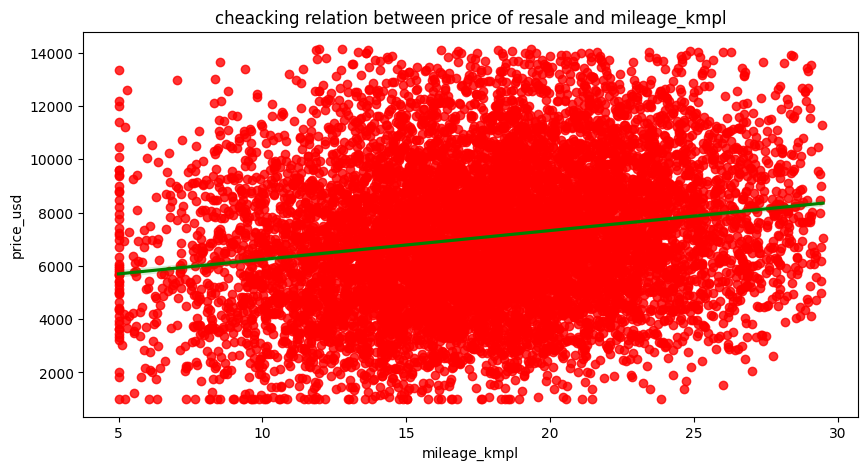

In [33]:
plt.figure(figsize=(10,5))
sns.regplot(x='mileage_kmpl',y='price_usd', data=df,line_kws={"color":"green"},color='red')
plt.title('cheacking relation between price of resale and mileage_kmpl')
plt.xlabel('mileage_kmpl',fontsize=10)
plt.ylabel('price_usd',fontsize=10)
plt.show()      

Observation:From graph we can see that the mileage_kmpl and price of resale have positive realtion.As the mileage of car increase then resale price also increase.

In [34]:
df['engine_cc'].unique()

array([4000, 1500, 2500,  800, 1000, 2000, 5000, 1800, 3000, 1200])

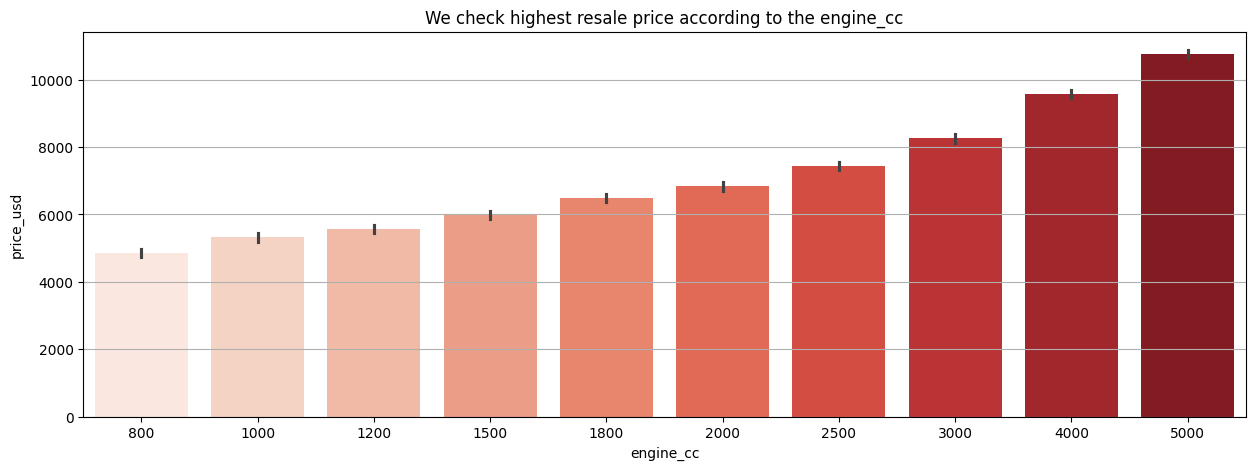

In [35]:
plt.figure(figsize=(15,5))
sns.barplot(x='engine_cc',y='price_usd',data=df,palette='Reds')
plt.title('We check highest resale price according to the engine_cc')
plt.xlabel('engine_cc',fontsize=10)
plt.ylabel('price_usd',fontsize=10)
plt.grid(axis='y')

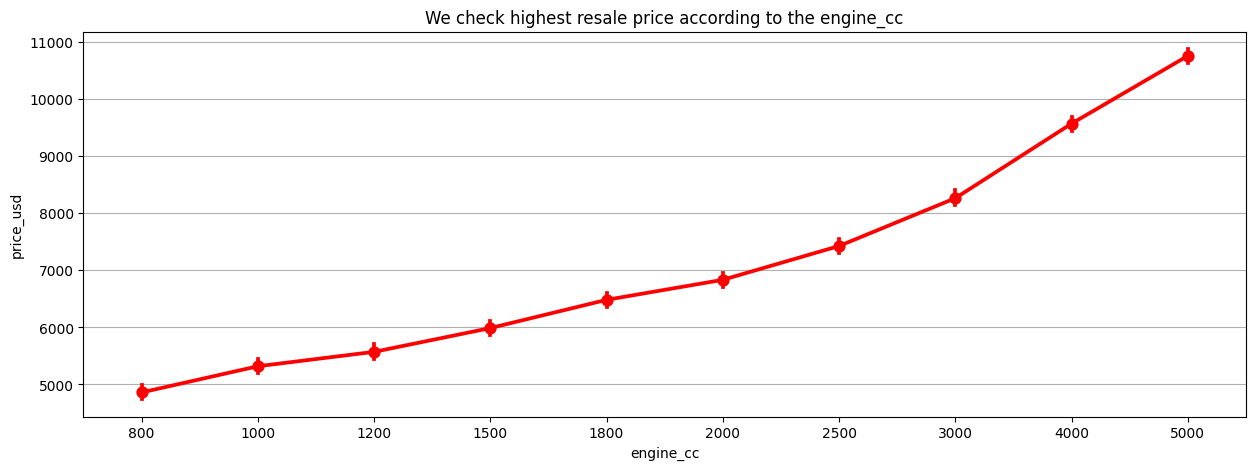

In [36]:
plt.figure(figsize=(15,5))
sns.pointplot(x='engine_cc',y='price_usd',data=df,color="r")
plt.title('We check highest resale price according to the engine_cc')
plt.xlabel('engine_cc',fontsize=10)
plt.ylabel('price_usd',fontsize=10)
plt.grid(axis='y')

Observation:From graph we can see that the engine_cc and price of resale have positive realtion.As the capcity of engine of car increase then resale price also increase.Highest resale price car which has engine capacity of 5000cc.

In [37]:
df['fuel_type'].unique()

array(['Petrol', 'Diesel', 'Electric'], dtype=object)

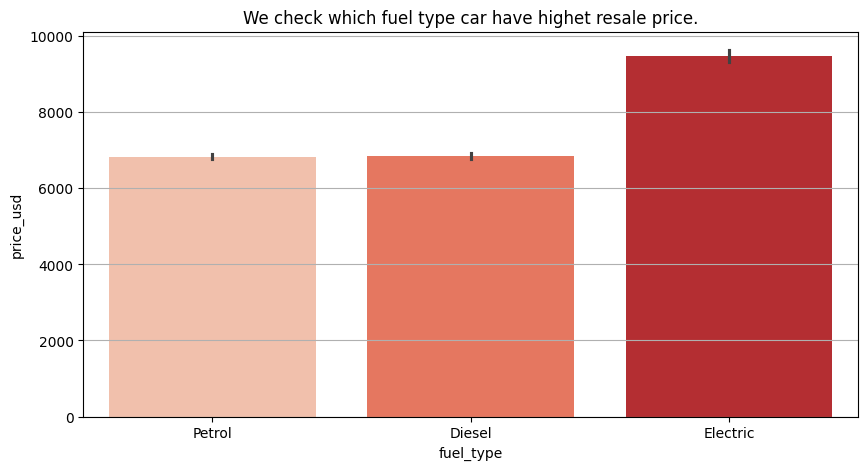

In [38]:
plt.figure(figsize=(10,5))
sns.barplot(x='fuel_type',y='price_usd',data=df,palette='Reds')
plt.title('We check which fuel type car have highet resale price.')
plt.xlabel('fuel_type',fontsize=10)
plt.ylabel('price_usd',fontsize=10)
plt.grid(axis='y')
            

Observation:Petrol and Diesel fuel cars have almost same high resale price where as electric vehicle have highest price of resale than peirol and diesel cars.

In [39]:
df['owner_count'].unique()

array([4, 5, 1, 2, 3])

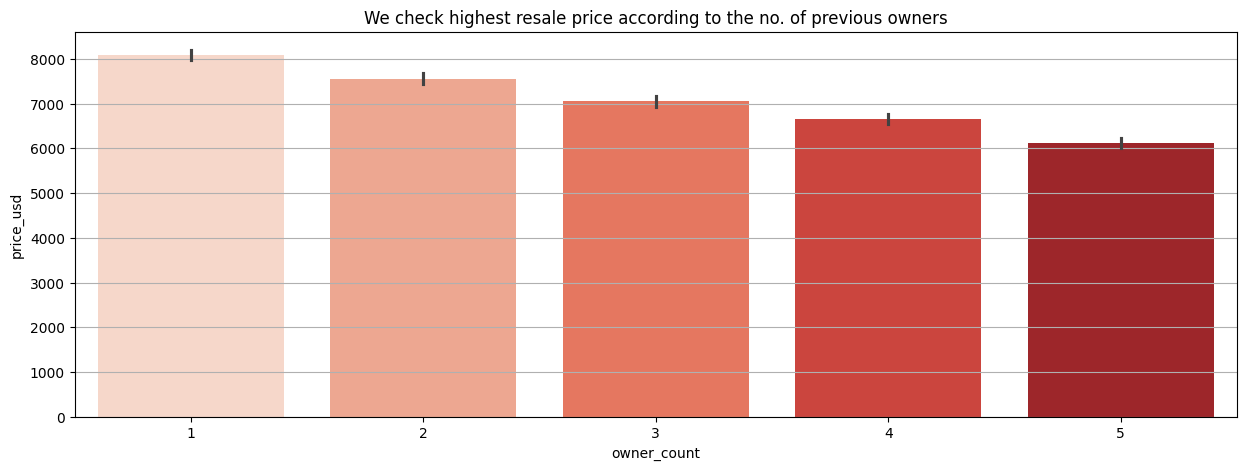

In [40]:
plt.figure(figsize=(15,5))
sns.barplot(x='owner_count',y='price_usd',data=df,palette='Reds')
plt.title('We check highest resale price according to the no. of previous owners')
plt.xlabel('owner_count',fontsize=10)
plt.ylabel('price_usd',fontsize=10)
plt.grid(axis='y')

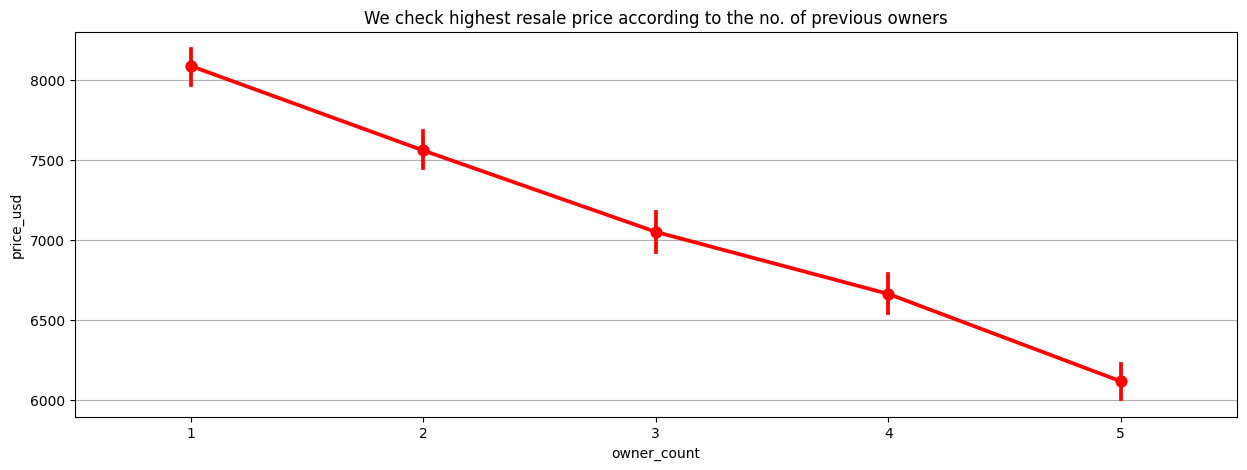

In [41]:
plt.figure(figsize=(15,5))
sns.pointplot(x='owner_count',y='price_usd',data=df,color="r")
plt.title('We check highest resale price according to the no. of previous owners')
plt.xlabel('owner_count',fontsize=10)
plt.ylabel('price_usd',fontsize=10)
plt.grid(axis='y')

Observation:From graph we can see that the engine_cc and price of resale have negative realtion.As the no. of users of car are increase then resale price also decrease.Highest resale price car which has only one user previously.

In [42]:
df['brand'].unique()

array(['Chevrolet', 'Honda', 'BMW', 'Hyundai', 'Nissan', 'Tesla',
       'Toyota', 'Kia', 'Volkswagen', 'Ford'], dtype=object)

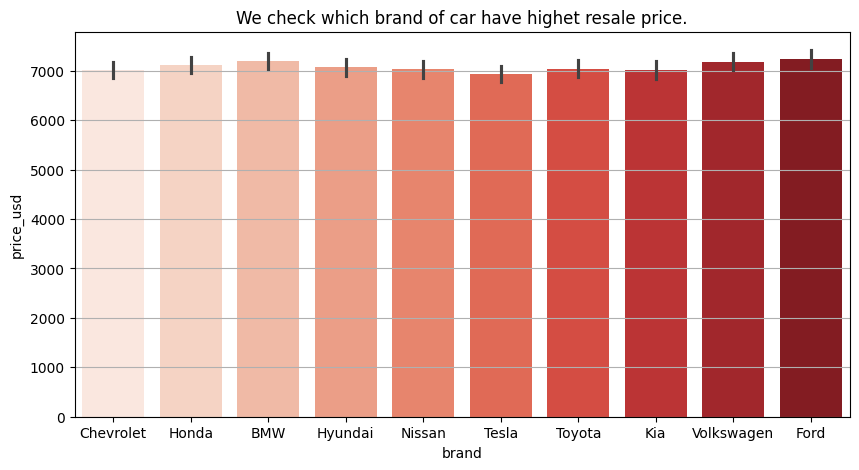

In [43]:
plt.figure(figsize=(10,5))
sns.barplot(x='brand',y='price_usd',data=df,palette='Reds')
plt.title('We check which brand of car have highet resale price.')
plt.xlabel('brand',fontsize=10)
plt.ylabel('price_usd',fontsize=10)
plt.grid(axis='y')

Observation:Ford, Volkswagen, Kia, and Toyota have the highest average resale prices, all roughly in the range of 7000 to 7200.


Chevrolet, Honda, BMW, Hyundai, Nissan, and Tesla show slightly lower average resale prices, typically between 6900 and 7100.


The variation between the highest and lowest average prices is small, suggesting that resale values are relatively consistent across brands.



In [44]:
df['transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

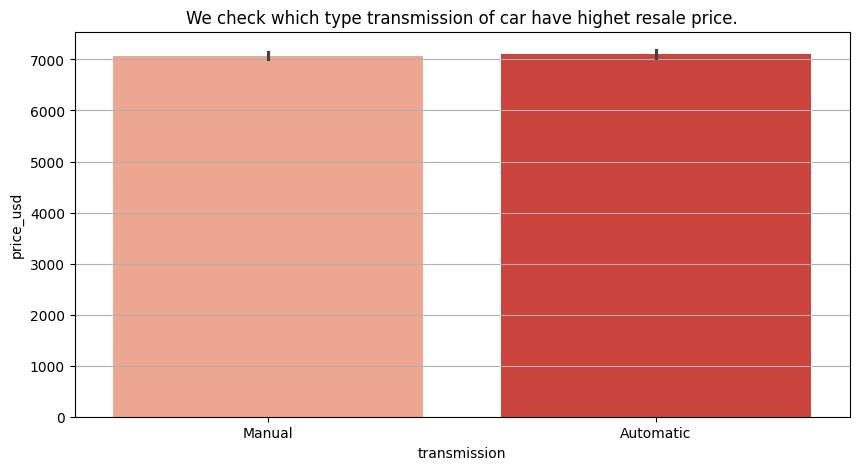

In [45]:
plt.figure(figsize=(10,5))
sns.barplot(x='transmission',y='price_usd',data=df,palette='Reds')
plt.title('We check which type transmission of car have highet resale price.')
plt.xlabel('transmission',fontsize=10)
plt.ylabel('price_usd',fontsize=10)
plt.grid(axis='y')
            

Observation:From barplot we can see that the both the transmission type of car have almost same resale price.

In [46]:
df['service_history'].unique()

array(['Full', 'Partial'], dtype=object)

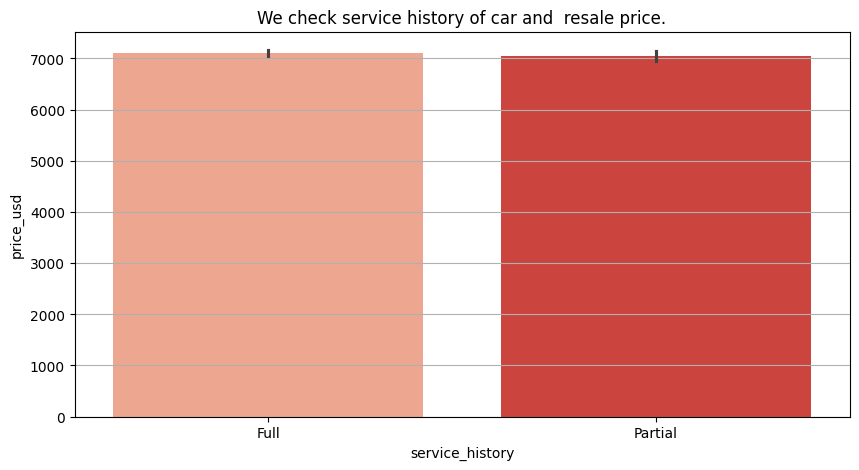

In [47]:
plt.figure(figsize=(10,5))
sns.barplot(x='service_history',y='price_usd',data=df,palette='Reds')
plt.title('We check service history of car and  resale price.')
plt.xlabel('service_history',fontsize=10)
plt.ylabel('price_usd',fontsize=10)
plt.grid(axis='y')

Observation: From barplot we can see that the car who have service history is full they have highest resale price and who have service history is partial, they have resale price is lower than full.almost both have small change in resale price.

In [48]:
df['accidents_reported'].unique()

array([0, 1, 2])

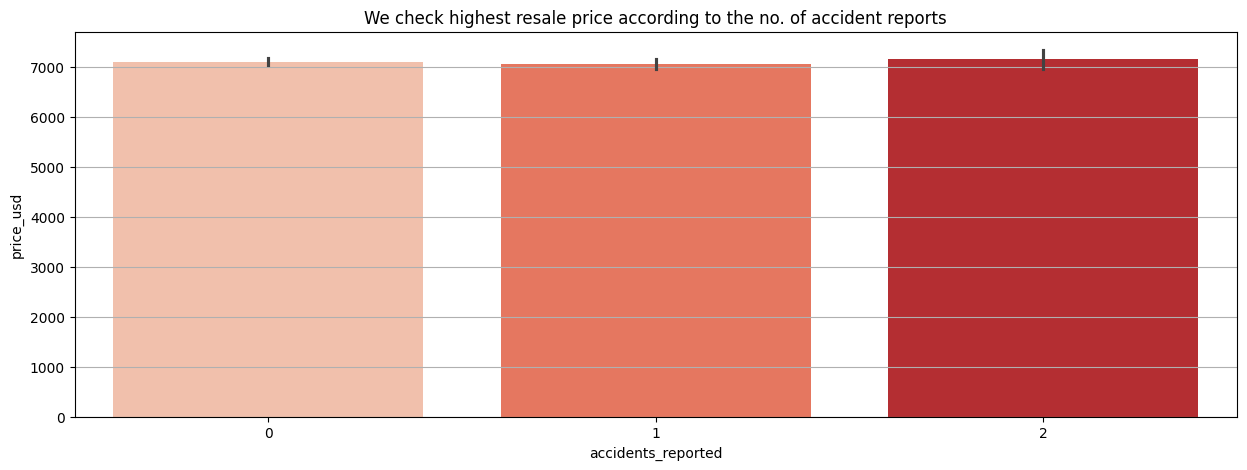

In [49]:
plt.figure(figsize=(15,5))
sns.barplot(x='accidents_reported',y='price_usd',data=df,palette='Reds')
plt.title('We check highest resale price according to the no. of accident reports')
plt.xlabel('accidents_reported',fontsize=10)
plt.ylabel('price_usd',fontsize=10)
plt.grid(axis='y')

Observation:From the barplot, we can see that as the number of accident reports increases, the average resale price decreases slightly.

Cars with 0 accidents have the highest average resale price.

Cars with 1 or 2 accidents show a gradual decline in resale value.

This suggests that accident history negatively impacts resale price, although the effect is not drastically large in this dataset.



In [50]:
df['insurance_valid'].unique()

array(['No', 'Yes'], dtype=object)

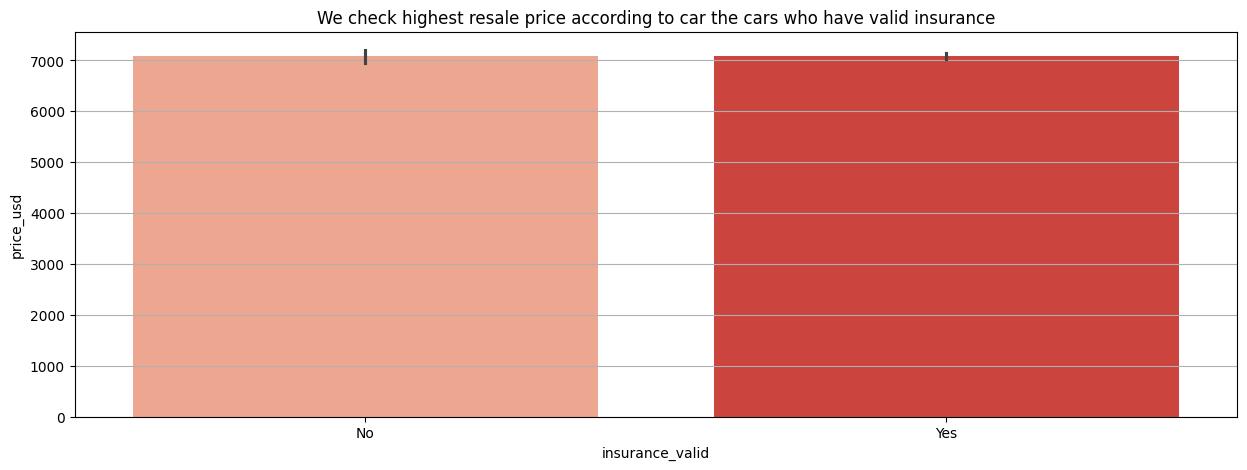

In [51]:
plt.figure(figsize=(15,5))
sns.barplot(x='insurance_valid',y='price_usd',data=df,palette='Reds')
plt.title('We check highest resale price according to car the cars who have valid insurance')
plt.xlabel('insurance_valid',fontsize=10)
plt.ylabel('price_usd',fontsize=10)
plt.grid(axis='y')

Observation:From the barplot, we can see that cars with valid insurance tend to have a slightly higher average resale price compared to those without valid insurance.

Although the difference is not very large, it is noticeable and consistent.

This suggests that valid insurance adds value to a used car, likely because it implies the car is better maintained and legally safer to transfer.



In [52]:
df['color'].unique()

array(['White', 'Black', 'Blue', 'Red', 'Gray', 'Silver'], dtype=object)

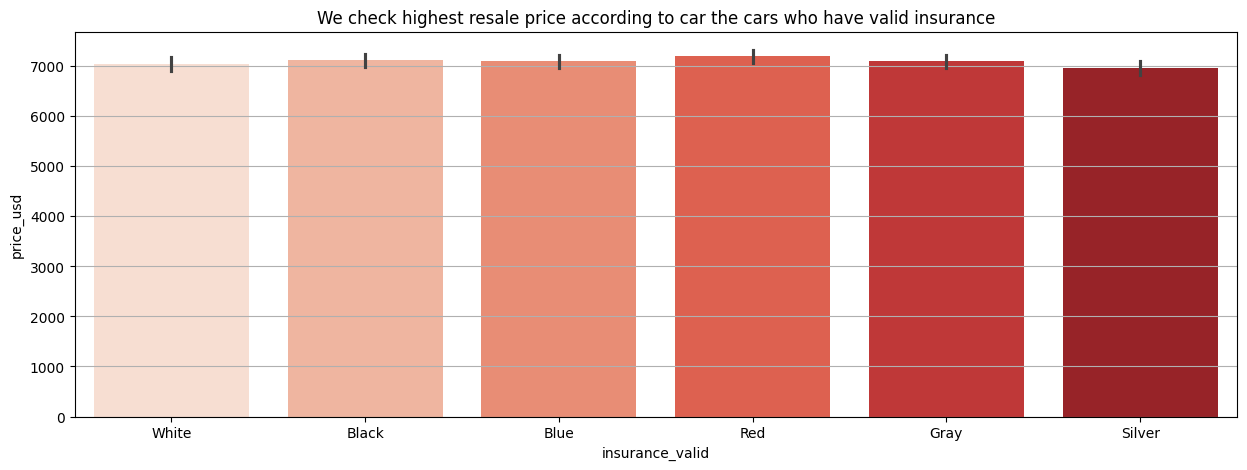

In [53]:
plt.figure(figsize=(15,5))
sns.barplot(x='color',y='price_usd',data=df,palette='Reds')
plt.title('We check highest resale price according to car the cars who have valid insurance')
plt.xlabel('insurance_valid',fontsize=10)
plt.ylabel('price_usd',fontsize=10)
plt.grid(axis='y')

Observation:Red cars with valid insurance have the highest resale price.

Silver cars have the lowest resale price among all colors.

Other colors like Black, Blue, Gray, and White show similar resale prices, with small variations.

In [54]:
num=df.select_dtypes(include="number")
num


,make_year,mileage_kmpl,engine_cc,owner_count,price_usd,accidents_reported
0,2001,8.17,4000,4,8587.64,0
1,2014,17.59,1500,4,5943.50,0
2,2023,18.09,2500,5,9273.58,1
3,2009,11.28,800,1,6836.24,0
4,2005,12.23,1000,2,4625.79,0
...,...,...,...,...,...,...
9995,1996,15.25,1500,2,5498.71,0
9996,1997,14.45,5000,1,9588.31,0
9997,2002,19.41,1000,4,4557.10,0
9998,2005,12.95,4000,5,7413.59,0


In [55]:
correlation=num.corr()
correlation

,make_year,mileage_kmpl,engine_cc,owner_count,price_usd,accidents_reported
make_year,1.000000,-0.015984,-0.033121,-0.016102,0.430432,-0.009073
mileage_kmpl,-0.015984,1.000000,-0.017381,-0.001924,0.196033,0.011739
engine_cc,-0.033121,-0.017381,1.000000,0.011190,0.665947,-0.005145
owner_count,-0.016102,-0.001924,0.011190,1.000000,-0.255227,-0.003532
price_usd,0.430432,0.196033,0.665947,-0.255227,1.000000,-0.000566
accidents_reported,-0.009073,0.011739,-0.005145,-0.003532,-0.000566,1.000000


<Axes: >

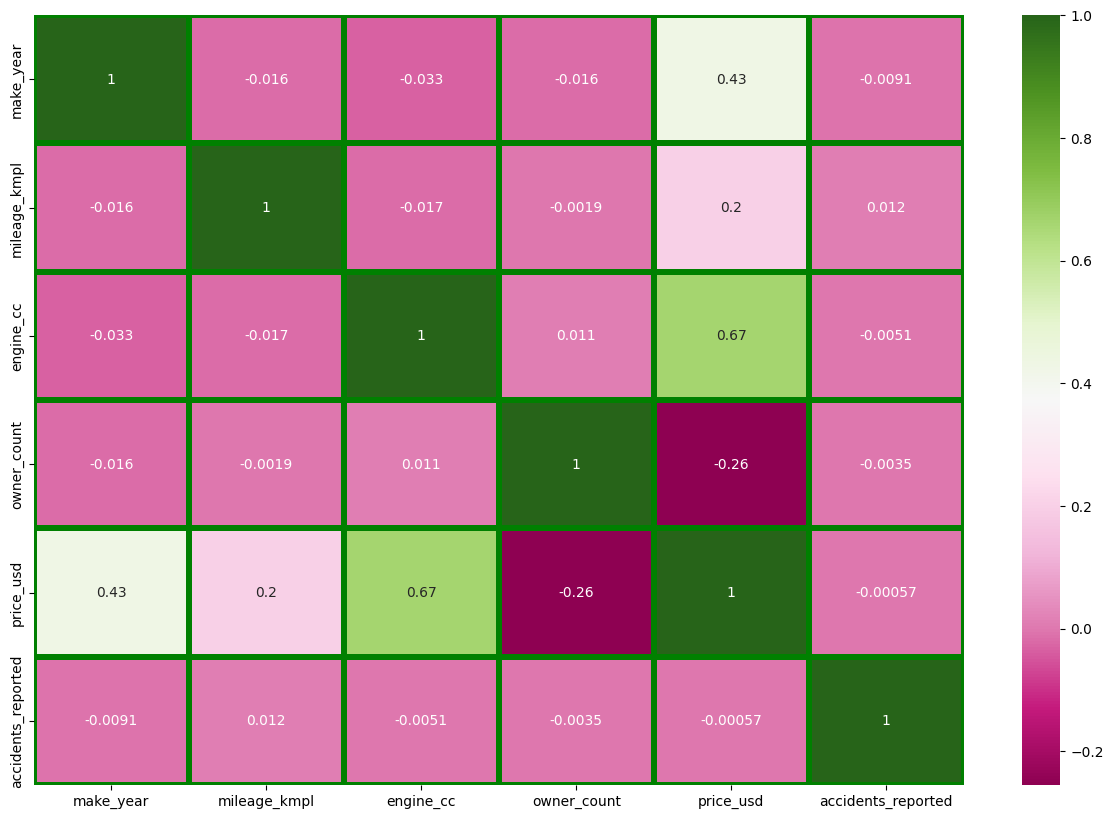

In [56]:
plt.figure(figsize=(15,10))
sns.heatmap(num.corr(),annot=True,linewidths=4,linecolor="g",cmap='PiYG')
